In [33]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-

import pandas as pd
import matplotlib.ticker as tick
import numpy as np
from matplotlib import pyplot as plt
import csv
import sys

import math
from cycler import cycler

DEFAULT_WIDTH = 6.4

CAPYBARA_C = 'xkcd:blue'
CAPYBARA_C2 = 'xkcd:dark blue'
COMPARE1_C = 'xkcd:grass green'
COMPARE1_C2 = 'xkcd:dark green'
BASELINE_C = 'xkcd:grey'
COMPARE2_C = 'xkcd:orange'
COMPARE3_C = 'xkcd:purple'

C = [
    'xkcd:grass green',
    'xkcd:blue',
    'xkcd:purple',
    'xkcd:orange',
    'xkcd:teal',
    'xkcd:brick red',
    'xkcd:black',
    'xkcd:brown',
    'xkcd:grey',
]

LS = [
    'solid',
    'dashed',
    'dotted',
    'dashdot'
]

M = [
    'o',
    's',
    '^',
    'v',
    'D'
]

# MS = [
#     1,
#     1,
#     3,
#     3,
#     1
# ]


def setup():
    """Called before every plot_ function"""

    def lcm(a, b):
        return abs(a*b) // math.gcd(a, b)

    def a(c1, c2):
        """Add cyclers with lcm."""
        l = lcm(len(c1), len(c2))
        c1 = c1 * (l//len(c1))
        c2 = c2 * (l//len(c2))
        return c1 + c2

    def add(*cyclers):
        s = None
        for c in cyclers:
            if s is None:
                s = c
            else:
                s = a(s, c)
        return s


    plt.rc('axes', prop_cycle=(add(cycler(color=C),
                                   cycler(linestyle=LS),
                                   cycler(marker=M))))
    plt.rc('lines', markersize=5)
    plt.rc('legend', handlelength=3, handleheight=1.5, labelspacing=0.25)
    plt.rcParams["font.family"] = "sans"
    plt.rcParams["font.size"] = 10
    plt.rcParams['pdf.fonttype'] = 42
    plt.rcParams['ps.fonttype'] = 42



def set_zeros():
    """Sets lower bound of x and y axis to zero"""
    _, r = plt.xlim()
    plt.xlim(0, r)
    _, r = plt.ylim()
    plt.ylim(0, r)

def millions(x, pos):
    'The two args are the value and tick position'
    return str(int(x/1000000)) + '.' + str(int((x%1000000)/100000)) + 'M'

def millions_no_decimal_point(x, pos):
    'The two args are the value and tick position'
    return str(int(x/1000000)) + 'M'

def thousands(x, pos):
    'The two args are the value and tick position'
    return str(int(x/1000)) + 'K'

def percents(x, pos):
    'The two args are the value and tick position'
    return str(x) + '%'

def seq_failover(x, pos):
    'The two args are the value and tick position'
    return str(int(x))

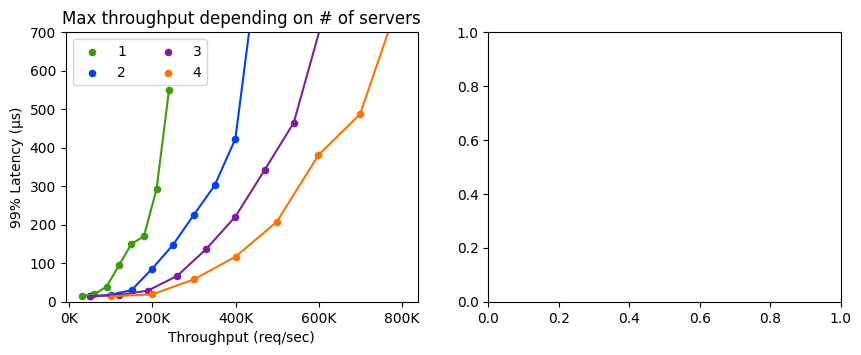

In [38]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3.5))  # Create a figure with two subplots

data = pd.read_csv("./num_servers_vs_max_tput.csv")

labels = [1, 2, 3, 4]
# Loop over each column and sort the data based on y-values
for i in range(0, 4):
    column_x = f'x{i}'
    column_y = f'y{i}'
    ax1.scatter(data[column_x], data[column_y], label=f"{labels[i]}", marker='o', color=C[i], s=20)
    avg_data = data.groupby(column_x)[column_y].mean()
    ax1.plot(avg_data.index, avg_data.values, color=C[i])

# for i in range(5, 9):
#     column_x = f'x{i}'
#     column_y = f'y{i}'
#     ax2.scatter(data[column_x], data[column_y], label=f"{labels[i-5]}", marker='X', color=C[i-5], s=20)
#     avg_data = data.groupby(column_x)[column_y].mean()
#     ax2.plot(avg_data.index, avg_data.values, color=C[i-5], linestyle='--')


ax1.set_title("Max throughput depending on # of servers")
ax1.set_ylabel("99% Latency (μs)")
ax1.set_xlabel("Throughput (req/sec)")
ax1.legend(ncol=2, loc="upper left")
ax1.set_ylim([0, 700])

# ax2.set_title("Migration Eanbled (0 migrations)")
# ax2.set_ylabel("99.99% Latency (μs)")
# ax2.set_xlabel("Throughput (req/sec)")
# ax2.legend(ncol=2, loc="upper left")


# plt.legend()

# plt.xlim([0, 3500000])
# plt.xticks(np.arange(0, 2200001, 500000))

# set_zeros()

ax1.xaxis.set_major_formatter(tick.FuncFormatter(thousands))
# ax2.xaxis.set_major_formatter(tick.FuncFormatter(thousands))

# plt.show()

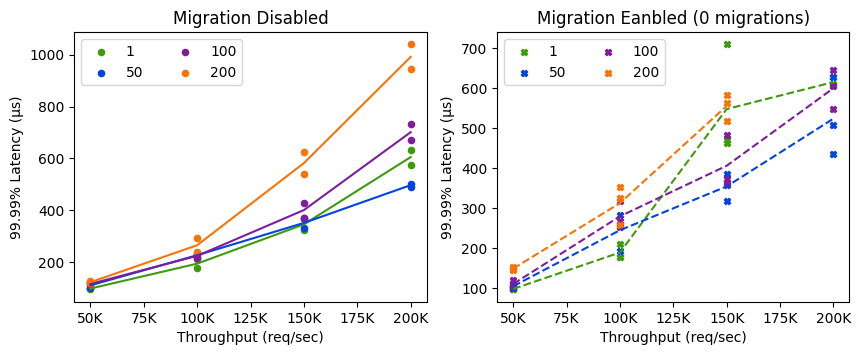

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 3.5))  # Create a figure with two subplots

data = pd.read_csv("./1server.csv")

labels = [1, 50, 100, 200]
# Loop over each column and sort the data based on y-values
for i in range(1, 5):
    column_x = f'x{i}'
    column_y = f'y{i}'
    ax1.scatter(data[column_x], data[column_y], label=f"{labels[i-1]}", marker='o', color=C[i-1], s=20)
    avg_data = data.groupby(column_x)[column_y].mean()
    ax1.plot(avg_data.index, avg_data.values, color=C[i-1])

for i in range(5, 9):
    column_x = f'x{i}'
    column_y = f'y{i}'
    ax2.scatter(data[column_x], data[column_y], label=f"{labels[i-5]}", marker='X', color=C[i-5], s=20)
    avg_data = data.groupby(column_x)[column_y].mean()
    ax2.plot(avg_data.index, avg_data.values, color=C[i-5], linestyle='--')


ax1.set_title("Migration Disabled")
ax1.set_ylabel("99.99% Latency (μs)")
ax1.set_xlabel("Throughput (req/sec)")
ax1.legend(ncol=2, loc="upper left")


ax2.set_title("Migration Eanbled (0 migrations)")
ax2.set_ylabel("99.99% Latency (μs)")
ax2.set_xlabel("Throughput (req/sec)")
ax2.legend(ncol=2, loc="upper left")


# plt.legend()

# plt.xlim([0, 3500000])
# ax1.set_ylim([0, 1000])
# plt.xticks(np.arange(0, 2200001, 500000))

# set_zeros()

ax1.xaxis.set_major_formatter(tick.FuncFormatter(thousands))
ax2.xaxis.set_major_formatter(tick.FuncFormatter(thousands))

# plt.show()



** Migration disabled
- MAX throughput ~ 200K
- 50 connections shows lower latency than 1 connection 
    * requests are distributed across connections => shorter queue length 
- 100+ connections => higher latency 
    * no more advantage of shorter queue length
    * emerging disadvantage of longer polling latency of each iteration (since polling all connections per iteration)

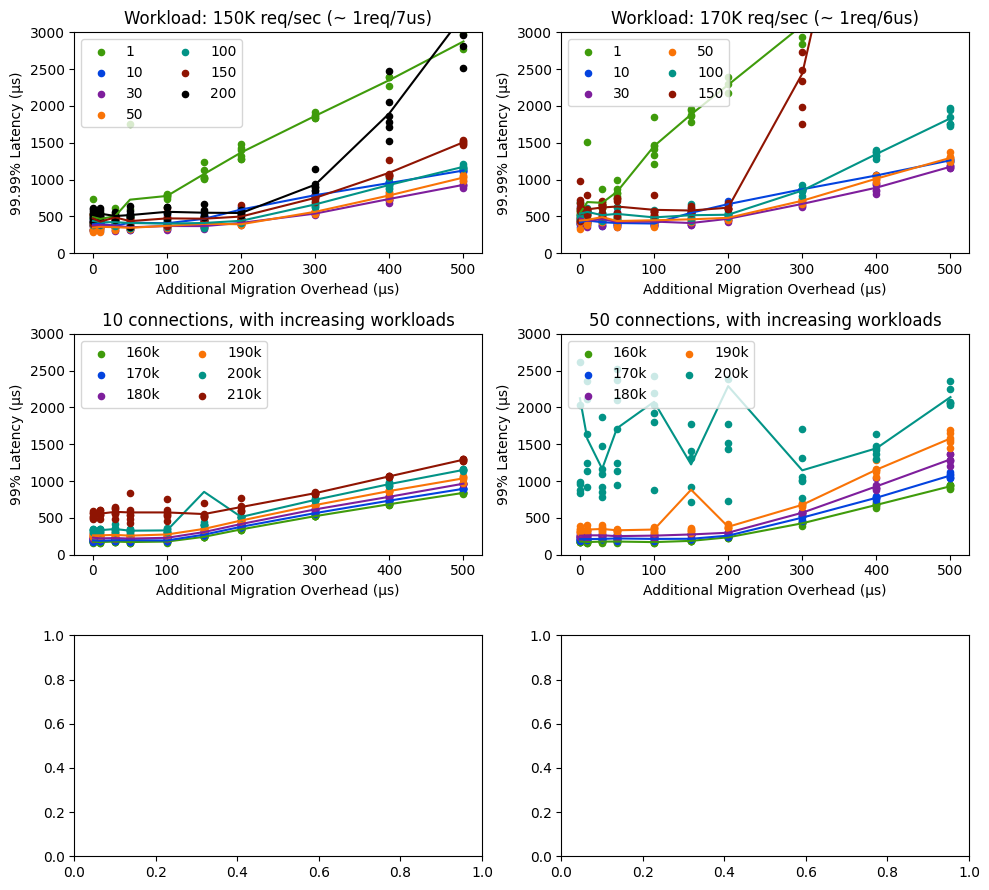

In [46]:
fig, axes = plt.subplots(3, 2, figsize=(10, 9))  # Create a figure with 3 rows and 2 columns of subplots

# Access each subplot using the axes array
ax1 = axes[0, 0]  # First subplot in the first row
ax2 = axes[0, 1]  # Second subplot in the first row
ax3 = axes[1, 0]  # First subplot in the second row
ax4 = axes[1, 1]  # Second subplot in the second row
ax5 = axes[2, 0]  # First subplot in the third row
ax6 = axes[2, 1]  # Second subplot in the third row
data = pd.read_csv("./150k_migrate_overhead_vs_tail.csv")


# Loop over each column and sort the data based on y-values
labels = [1, 10, 30, 50, 100, 150, 200]
for i in range(0, 7):
    column_x = f'x{i}'
    column_y = f'y{i}'
    ax1.scatter(data[column_x], data[column_y], label=f"{labels[i]}", marker='o', color=C[i], s=20)
    avg_data = data.groupby(column_x)[column_y].mean()
    ax1.plot(avg_data.index, avg_data.values, color=C[i])
    # Plot the sorted data as a line graph
    # ax1.scatter(sorted_data[column_x], sorted_data[column_y], label=f"{labels[i-1]}", marker=M[i-i], color=C[i-1], s=20)
    # ax1.plot(sorted_data[column_x], sorted_data[column_y], label=f"{labels[i-1]}", marker=M[i-i], markersize=5, color = C[i-1])

ax1.set_title("Workload: 150K req/sec (~ 1req/7us)")
ax1.set_ylabel("99.99% Latency (μs)")
ax1.set_xlabel("Additional Migration Overhead (μs)")
ax1.legend()
ax1.set_ylim([0, 3000])
# ax1.set_xlim([0, 500])
# plt.ylim([0, 2000])
# plt.xticks(np.arange(0, 2200001, 500000))

data2 = pd.read_csv("./170k_migrate_overhead_vs_tail.csv")

for i in range(0, 6):
    column_x = f'x{i}'
    column_y = f'y{i}'
    ax2.scatter(data2[column_x], data2[column_y], label=f"{labels[i]}", marker='o', color=C[i], s=20)
    avg_data = data2.groupby(column_x)[column_y].mean()
    ax2.plot(avg_data.index, avg_data.values, color=C[i])
    # Plot the sorted data as a line graph
    # ax1.scatter(sorted_data[column_x], sorted_data[column_y], label=f"{labels[i-1]}", marker=M[i-i], color=C[i-1], s=20)
    # ax1.plot(sorted_data[column_x], sorted_data[column_y], label=f"{labels[i-1]}", marker=M[i-i], markersize=5, color = C[i-1])

ax2.set_title("Workload: 170K req/sec (~ 1req/6us)")
ax2.set_ylabel("99.99% Latency (μs)")
ax2.set_xlabel("Additional Migration Overhead (μs)")
ax2.legend()
ax2.set_ylim([0, 3000])
# ax2.set_xlim([0, 500])
# plt.ylim([0, 3000])
# plt.xticks(np.arange(0, 2200001, 500000))

data = pd.read_csv("./10conn_mig_ovhd_with_inc_wklds.csv")
labels = ["160k", "170k", "180k", "190k", "200k", "210k"]
for i in range(0, 6):
    column_x = f'x{i}'
    column_y = f'y{i}'
    ax3.scatter(data[column_x], data[column_y], label=f"{labels[i]}", marker='o', color=C[i], s=20)
    avg_data = data.groupby(column_x)[column_y].mean()
    ax3.plot(avg_data.index, avg_data.values, color=C[i])
    # Plot the sorted data as a line graph
    # ax1.scatter(sorted_data[column_x], sorted_data[column_y], label=f"{labels[i-1]}", marker=M[i-i], color=C[i-1], s=20)
    # ax1.plot(sorted_data[column_x], sorted_data[column_y], label=f"{labels[i-1]}", marker=M[i-i], markersize=5, color = C[i-1])

ax3.set_title("10 connections, with increasing workloads")
ax3.set_ylabel("99% Latency (μs)")
ax3.set_xlabel("Additional Migration Overhead (μs)")
ax3.legend()
ax3.set_ylim([0, 3000])


data = pd.read_csv("./50conn_mig_ovhd_with_inc_wklds.csv")
labels = ["160k", "170k", "180k", "190k", "200k", "210k"]
for i in range(0, 5):
    column_x = f'x{i}'
    column_y = f'y{i}'
    ax4.scatter(data[column_x], data[column_y], label=f"{labels[i]}", marker='o', color=C[i], s=20)
    avg_data = data.groupby(column_x)[column_y].mean()
    ax4.plot(avg_data.index, avg_data.values, color=C[i])
    # Plot the sorted data as a line graph
    # ax1.scatter(sorted_data[column_x], sorted_data[column_y], label=f"{labels[i-1]}", marker=M[i-i], color=C[i-1], s=20)
    # ax1.plot(sorted_data[column_x], sorted_data[column_y], label=f"{labels[i-1]}", marker=M[i-i], markersize=5, color = C[i-1])

ax4.set_title("50 connections, with increasing workloads")
ax4.set_ylabel("99% Latency (μs)")
ax4.set_xlabel("Additional Migration Overhead (μs)")
ax4.legend()
ax4.set_ylim([0, 3000])



ax1.legend(ncol=2, loc="upper left")
ax2.legend(ncol=2, loc="upper left")
ax3.legend(ncol=2, loc="upper left")
ax4.legend(ncol=2, loc="upper left")


plt.tight_layout()  # Adjust spacing between subplots
set_zeros()

### Migration Overhead VS Tail Latency
** \# of migrations: 10000 \
** dots are values of each run, line is the average of each migration overhead 
- With 150K workload, tail latency shoots up from 300 us overhead, only for 1 connection case
    * Why only 1 connection case? When there are many connections, requests are distributed, so just a few requests are queued up on each connection during the migration.
- With 170K workload, servers are collapsed with 200+ us migration overhead, but shows a similar latency surge (see raw data) 
- Can we show 1 connection case?